# (Investigating COVID-19 Impact on Flights Delay Time For The Top 4 Airlines in US)
## by (Zaid Ghazal)

www.transtats.bts.gov is a website contains various datasets for transportation means details. In this notebook, python popular data analysis packages are used to investigate the COVID-19 effect on flights and the airlines on-time performance for the top 4 airlines (carriers) in US. The data records are taken in May-2018, May-2019, and May-2020. The purpose is to compare 2018 and 2019 May season with the former in 2020 (during the global crisis). There are three datasets (one for each year) that need assessing cleaning. Also, they should be combined first in one DataFrame.

**Note**: The departure/arrival delay columns (in minutes) might have negative number. This means the flight departed/arrived before the scheduled time.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [ ]:
df_2018 = pd.read_csv('May_2018.csv')
df_2019 = pd.read_csv('May_2019.csv')
df_2020 = pd.read_csv('May_2020.csv')

In [ ]:
df_2018.head()

,YEAR,MONTH,OP_UNIQUE_CARRIER,ORIGIN_STATE_NM,DEST_STATE_NM,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,DISTANCE
0,2018,5,EV,Texas,South Carolina,-3.0,0.0,-18.0,0.0,0,878
1,2018,5,EV,Texas,South Carolina,-1.0,0.0,-18.0,0.0,0,878
2,2018,5,EV,Texas,South Carolina,-5.0,0.0,-17.0,0.0,0,878
3,2018,5,EV,Texas,South Carolina,-4.0,0.0,-24.0,0.0,0,878
4,2018,5,EV,Texas,South Carolina,-1.0,0.0,-4.0,0.0,0,878


In [ ]:
df_2019.head()

,YEAR,MONTH,OP_UNIQUE_CARRIER,ORIGIN_STATE_NM,DEST_STATE_NM,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,DISTANCE
0,2019,5,YX,Missouri,New Jersey,-2.0,0.0,-2.0,0.0,0,872
1,2019,5,YX,Illinois,North Carolina,-9.0,0.0,-27.0,0.0,0,646
2,2019,5,YX,Minnesota,Illinois,-6.0,0.0,-7.0,0.0,0,334
3,2019,5,YX,Illinois,Tennessee,-5.0,0.0,-6.0,0.0,0,409
4,2019,5,YX,New Jersey,Missouri,-8.0,0.0,-17.0,0.0,0,1092


In [ ]:
df_2020.head()

,YEAR,MONTH,OP_UNIQUE_CARRIER,ORIGIN_STATE_NM,DEST_STATE_NM,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,DISTANCE
0,2020,5,WN,Hawaii,Hawaii,-5.0,0.0,-19.0,0.0,0,163
1,2020,5,WN,Hawaii,Hawaii,-19.0,0.0,-25.0,0.0,0,84
2,2020,5,WN,Nevada,New Mexico,-3.0,0.0,-17.0,0.0,0,486
3,2020,5,WN,Nevada,New Mexico,-3.0,0.0,-10.0,0.0,0,486
4,2020,5,WN,Nevada,Georgia,-1.0,0.0,-27.0,0.0,0,1747


In [ ]:
# Combining the three datasets using .concat() function in new variable named `df_all`
frames = [df_2018, df_2019, df_2020]
df_all = pd.concat(frames, ignore_index=True)
df_all

,YEAR,MONTH,OP_UNIQUE_CARRIER,ORIGIN_STATE_NM,DEST_STATE_NM,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,DISTANCE
0,2018,5,EV,Texas,South Carolina,-3.0,0.0,-18.0,0.0,0,878
1,2018,5,EV,Texas,South Carolina,-1.0,0.0,-18.0,0.0,0,878
2,2018,5,EV,Texas,South Carolina,-5.0,0.0,-17.0,0.0,0,878
3,2018,5,EV,Texas,South Carolina,-4.0,0.0,-24.0,0.0,0,878
4,2018,5,EV,Texas,South Carolina,-1.0,0.0,-4.0,0.0,0,878
...,...,...,...,...,...,...,...,...,...,...,...
1433531,2020,5,UA,New Jersey,California,-6.0,0.0,-35.0,0.0,0,2454
1433532,2020,5,UA,Ohio,New Jersey,-14.0,0.0,-23.0,0.0,0,404
1433533,2020,5,UA,Colorado,Arizona,-3.0,0.0,-25.0,0.0,0,602
1433534,2020,5,UA,California,Virginia,-6.0,0.0,-9.0,0.0,0,2419


### What is the structure of your dataset?
The dataset consists of flights primary information and the delay time occurred in departure or/and arrival. Each row indicates a flight with unique flight number and its information. Besides, each column refer to specific feature like the carrier name and the delay duration ...etc.

### What is/are the main feature(s) of interest in your dataset?
- `YEAR`: The flight date in years
- `MONTH`: The flight date in months (All flights are in May)
- `OP_UNIQUE_CARRIER`: Airline name code
- `ORIGIN_STATE_NM` and `DEST_STATE_NM`: departure and arrival states names
- `DEP_DELAY and ARR_DELAY`: The delay duration on departure/arrival, in minutes
- `DEP_DEL15` and `ARR_DEL15`: If the delay duration on departure/arrival is more than or equal to 15 minutes, the value would be 1
- `CANCELLED`: weather the flight canceled or not 
- `DISTANCE`: Traveling distance, in miles
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- `OP_UNIQUE_CARRIER` (Carrier name)
- `DEP_DELAY` and `ARR_DELAY`
- `CANCELLED`
- `DISTANCE`
- `YEAR`

## Data Wrangling:

In [ ]:
df_all.drop(columns=['MONTH'], axis=1, inplace=True)
#since all flights are in May, wee do not need the 'MONTH' column 

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433536 entries, 0 to 1433535
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   YEAR               1433536 non-null  int64  
 1   OP_UNIQUE_CARRIER  1433536 non-null  object 
 2   ORIGIN_STATE_NM    1433536 non-null  object 
 3   DEST_STATE_NM      1433536 non-null  object 
 4   DEP_DELAY          1402067 non-null  float64
 5   DEP_DEL15          1402067 non-null  float64
 6   ARR_DELAY          1397296 non-null  float64
 7   ARR_DEL15          1397296 non-null  float64
 8   CANCELLED          1433536 non-null  int64  
 9   DISTANCE           1433536 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 109.4+ MB


In [ ]:
# Change columns names to be percise and easier to deal with
df_all.rename(columns={'OP_UNIQUE_CARRIER':'carrier',
                          'ORIGIN_STATE_NM':'departure_state',
                          'DEST_STATE_NM':'arrival_state',
                          'DEP_DELAY_NEW':'departure_delay',       
                          'ARR_DELAY_NEW':'arrival_delay',
                           'DEP_DEL15':'departure_over15_delay' ,
                           'ARR_DEL15':'arrival_over15_delay' ,
                      'ARR_DELAY':'arrival_delay',
                      'DEP_DELAY':'departure_delay'}, 
                 inplace=True)
df_all.columns = map(str.lower, df_all.columns) # Apply .lower() to ensure all columns in lower case
df_all.head()

,year,carrier,departure_state,arrival_state,departure_delay,departure_over15_delay,arrival_delay,arrival_over15_delay,cancelled,distance
0,2018,EV,Texas,South Carolina,-3.0,0.0,-18.0,0.0,0,878
1,2018,EV,Texas,South Carolina,-1.0,0.0,-18.0,0.0,0,878
2,2018,EV,Texas,South Carolina,-5.0,0.0,-17.0,0.0,0,878
3,2018,EV,Texas,South Carolina,-4.0,0.0,-24.0,0.0,0,878
4,2018,EV,Texas,South Carolina,-1.0,0.0,-4.0,0.0,0,878


In [ ]:
df_all.carrier.unique() # Check the carriers codes found the dataset

array(['EV', 'G4', 'MQ', 'OH', 'OO', 'WN', 'YV', 'YX', 'AA', 'DL', 'UA',
       '9E', 'AS', 'B6', 'NK', 'HA', 'F9'], dtype=object)

In [ ]:
df_all.replace({'carrier': {'9E': 'Endeavor Air', 
                        'AA': 'American Airlines',
                        'AS':'Alaska Airlines',
                       'B6':'JetBlue Airways',
                       'CO':'Continental Air Lines',
                       'DH': 'Independence Air',
                       'DL':'Delta Air Lines',
                       'EA': 'Eastern Air Lines',
                       'EV':'ExpressJet Airlines',
                       'F9': 'Frontier Airlines',
                       'FL': 'AirTran Airways',
                       'MQ':'Envoy Air',
                       'OH': 'PSA Airlines',
                       'OO':'SkyWest Airlines',
                       'UA':'United Air Lines',
                       'US': 'US Airways',
                       'WN':'Southwest Airlines',
                       'XE':'ExpressJet Airlines',
                       'HA':'Hawaiian Airlines',
                       'YV':'Mesa Airlines',
                       'VX':'Virgin America',
                       'NK':'Spirit Air Lines',
                        'G4':'Allegiant Air',
                        'YX':'Republic Airline'   }}, inplace=True)
df_all.carrier.unique()
# Replace each carrier code by its name according to the table here: "https://www.transtats.bts.gov/FieldInfo.asp?Field_Desc=Unique%20Carrier%20Code.%20When%20the%20same%20code%20has%20been%20used%20by%20multiple%20carriers%2C%20a%20numeric%20suffix%20is%20used%20for%20earlier%20users%2C%20for%20example%2C%20PA%2C%20PA%281%29%2C%20PA%282%29.%20Use%20this%20field%20for%20analysis%20across%20a%20range%20of%20years.&Field_Type=Char&Lookup_Table=L_UNIQUE_CARRIERS&Table_ID=236&SYS_Table_Name=T_ONTIME_REPORTING&Sys_Field_Name=OP_UNIQUE_CARRIER"

array(['ExpressJet Airlines', 'Allegiant Air', 'Envoy Air',
       'PSA Airlines', 'SkyWest Airlines', 'Southwest Airlines',
       'Mesa Airlines', 'Republic Airline', 'American Airlines',
       'Delta Air Lines', 'United Air Lines', 'Endeavor Air',
       'Alaska Airlines', 'JetBlue Airways', 'Spirit Air Lines',
       'Hawaiian Airlines', 'Frontier Airlines'], dtype=object)

In [ ]:
flights_proportion = []
for carr in df_all['carrier'].unique():
    flights_count = df_all[(df_all.carrier == carr) & (df_all.year != 2020) ].shape[0]
    proportion = flights_count/df_all.query('year != 2020').shape[0] * 100
    
    flights_proportion.append({'carrier':carr, 'proportion':proportion }) 

data_proportion = pd.DataFrame(flights_proportion)
data_proportion
# Construct DataFrame that contains each carrier (airline) flights proportion over the last 2 years (2018,2019)
#by finding the total number of the carrier flights over the total flights

,carrier,proportion
0,ExpressJet Airlines,2.071243
1,Allegiant Air,1.361141
2,Envoy Air,4.322626
3,PSA Airlines,3.883092
4,SkyWest Airlines,10.950269
5,Southwest Airlines,18.732097
6,Mesa Airlines,2.989818
7,Republic Airline,4.433247
8,American Airlines,12.740089
9,Delta Air Lines,13.353936


In [ ]:
#  Sort by flights proportion descendingly
data_proportion = data_proportion.sort_values(by='proportion', ascending=False)

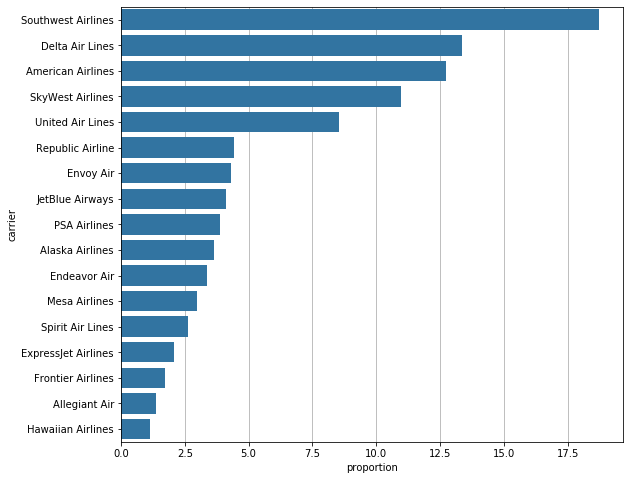

In [ ]:
plt.figure(figsize=(9,8))
sb.barplot(data=data_proportion ,y= 'carrier', x='proportion', color=sb.color_palette()[0], zorder=2)
plt.grid(axis='x', zorder=0)
#Visualize the flights proprtions
# Find the  carriers with the flights proportion more than or equal to 10%
# Result is ['Southwest Airlines', 'Delta Air Lines', 'American Airlines', 'SkyWest Airlines']

In [ ]:
selected_carriers = data_proportion.carrier[:4].tolist()
selected_carriers
# Select the top 4 airlined and sve then into the list `selected_carriers`

['Southwest Airlines',
 'Delta Air Lines',
 'American Airlines',
 'SkyWest Airlines']

In [ ]:
df_all = df_all[df_all.carrier.isin(selected_carriers)]
df_all.carrier.unique()
# Remove all records other than the top 4 carriers related ones

array(['SkyWest Airlines', 'Southwest Airlines', 'American Airlines',
       'Delta Air Lines'], dtype=object)

In [ ]:
order_list = selected_carriers
catigories = pd.api.types.CategoricalDtype(ordered=True, categories=order_list)
df_all['carrier'] = df_all['carrier'].astype(catigories) 
df_all['carrier'].unique()
# Change the `carrier` column type to order the airlines from most to least

[SkyWest Airlines, Southwest Airlines, American Airlines, Delta Air Lines]
Categories (4, object): [Southwest Airlines < Delta Air Lines < American Airlines < SkyWest Airlines]

In [ ]:
def plotNull(df):
    columns = []
    nulls_count = []
    for col in df.columns:
        columns.append(col)
        nulls_count.append(df[col].isna().sum())
    sb.barplot(x=nulls_count, y=columns)    
#Iterate over all columns to find nulls in each

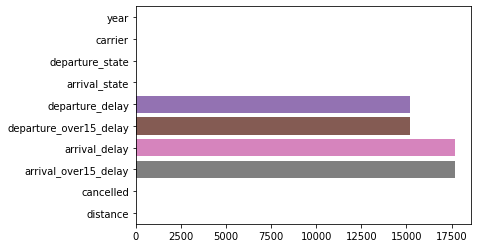

In [ ]:
plotNull(df_all)
# Each column's null values count.

In [ ]:
# Most of the nulls are related to canceled flights. The few remainings are considered as invlaid records 
# Create dataset that contains the cancelled flights `df_cancelled` and reset it's index.
df_canelled = df_all[(df_all.cancelled == 1 )]
df_canelled.reset_index(drop=True,inplace=True)
df_canelled.to_csv('cancelled flights.csv', index=False)
df_canelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15556 entries, 0 to 15555
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year                    15556 non-null  int64   
 1   carrier                 15556 non-null  category
 2   departure_state         15556 non-null  object  
 3   arrival_state           15556 non-null  object  
 4   departure_delay         363 non-null    float64 
 5   departure_over15_delay  363 non-null    float64 
 6   arrival_delay           0 non-null      float64 
 7   arrival_over15_delay    0 non-null      float64 
 8   cancelled               15556 non-null  int64   
 9   distance                15556 non-null  int64   
dtypes: category(1), float64(4), int64(3), object(2)
memory usage: 1.1+ MB


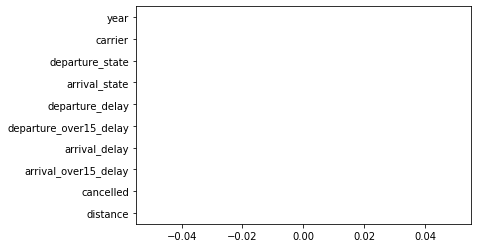

In [ ]:
# Drop all records with nulls and reset index. We are sure now all records in df_all refer to completed flights (no one canclled)
df_all.dropna(inplace=True)
df_all.reset_index(drop=True,inplace=True)
plotNull(df_all)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791395 entries, 0 to 791394
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   year                    791395 non-null  int64   
 1   carrier                 791395 non-null  category
 2   departure_state         791395 non-null  object  
 3   arrival_state           791395 non-null  object  
 4   departure_delay         791395 non-null  float64 
 5   departure_over15_delay  791395 non-null  float64 
 6   arrival_delay           791395 non-null  float64 
 7   arrival_over15_delay    791395 non-null  float64 
 8   cancelled               791395 non-null  int64   
 9   distance                791395 non-null  int64   
dtypes: category(1), float64(4), int64(3), object(2)
memory usage: 55.1+ MB


In [ ]:
df_all.to_csv('all_flights.csv',index=False)

In [ ]:
df = df_all.copy()
# Create a copy from the original dataset to work on
df.head()

,year,carrier,departure_state,arrival_state,departure_delay,departure_over15_delay,arrival_delay,arrival_over15_delay,cancelled,distance
0,2018,SkyWest Airlines,North Dakota,Minnesota,-2.0,0.0,1.0,0.0,0,223
1,2018,SkyWest Airlines,Minnesota,North Dakota,-7.0,0.0,4.0,0.0,0,223
2,2018,SkyWest Airlines,Minnesota,New Jersey,14.0,0.0,12.0,0.0,0,1008
3,2018,SkyWest Airlines,California,Utah,-9.0,0.0,-13.0,0.0,0,541
4,2018,SkyWest Airlines,Utah,California,-3.0,0.0,-5.0,0.0,0,541


In [ ]:
df.describe()

,year,departure_delay,departure_over15_delay,arrival_delay,arrival_over15_delay,cancelled,distance
count,791395.000000,791395.000000,791395.000000,791395.000000,791395.00000,791395.0,791395.000000
mean,2018.706924,9.753274,0.179575,3.693081,0.17442,0.0,779.127595
std,0.688802,43.141968,0.383834,45.470898,0.37947,0.0,548.061746
min,2018.000000,-54.000000,0.000000,-81.000000,0.00000,0.0,29.000000
25%,2018.000000,-5.000000,0.000000,-15.000000,0.00000,0.0,371.000000
50%,2019.000000,-2.000000,0.000000,-7.000000,0.00000,0.0,627.000000
75%,2019.000000,7.000000,0.000000,6.000000,0.00000,0.0,1017.000000
max,2020.000000,2105.000000,1.000000,2093.000000,1.00000,0.0,4502.000000


## Univariate Exploration

In [ ]:
def plotDelayHist(x='',bins=np.arange(0,2105+60,60), ylog=False):
   
   delay_df = df[df[x] >= 0]
   g = sb.FacetGrid(data= delay_df, col='year')
   g.map(plt.hist,x,bins=bins,edgecolor='w')
  
   if (ylog):
     g.set(yscale=('log'))
     y_max=1000000
     ticks = [y_max/100000,y_max/10000, y_max/1000, y_max/100, y_max/10, y_max] 
     g.set(yticks = ticks, yticklabels=ticks)   
   g.set(ylabel='Flights Count')  
# Draw multi-histograms using `seaborn` library and apply log scale on y axis to visualize the data better         

### Q1: How do the delay durations distributed on may among the three years ?

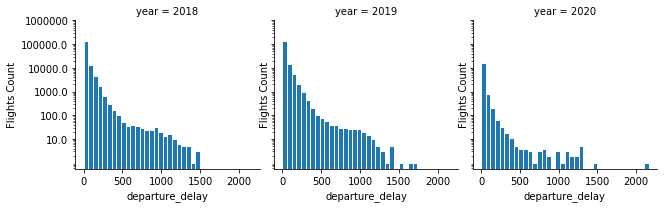

In [ ]:
plotDelayHist(x='departure_delay', ylog=True)
# each bin refers to 60 minutes delay (0-59),(60-119) ...etc. the bin height represent the number of flights with delay falls in the bin's interval

>#### The delay on departure seems to be skewed to the right with most flights fall in [0,59] minutes interval. However, the year 2020 had less overall flights count and delay durations, accordingly.

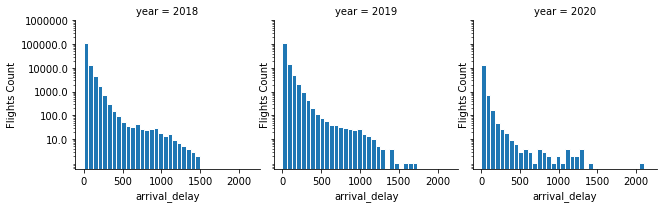

In [ ]:
plotDelayHist(x='arrival_delay', ylog=True)
# each bin refers to 60 minutes delay (0-59),(60-119) ...etc. the bin height represent the number of flights with delay falls in the bin's interval

> #### The delay on arrival seems also to be skewed to the right with most flights fall in [0,59] minutes interval. However, the year 2020 had less overall flights count and delay durations, accordingly. Consequently, the flights delayed on departure would have almost the same amount of delay on arrival.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The delay duration is skewed to the right (on both departure and arrival). Transformation is applied to the count axis (y-axis) to make the plot more clear. Interestingly, There are delays below 2000 minutes in 2018 and 2019. However, in 2020 some flights delayed more! 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Data is already assessed and cleaned to be tidy. The distribution is almost usual but there are some outliers that refer to huge delay which is a bad indication about the carrier.

## Bivariate Exploration

 ###  Q2.1: What is the relation between the traveled distance and delay on departure?

[1.  1.5 2.  2.5 3.  3.5 4. ]


Text(0, 0.5, 'Distance traveled (miles)')

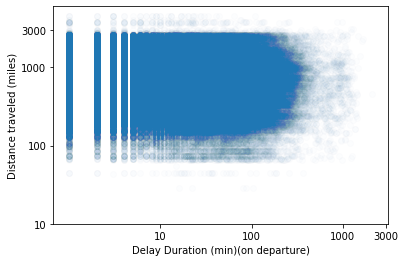

In [ ]:
from matplotlib.ticker import StrMethodFormatter

ylog = np.log10(df[df.departure_delay>0].distance)
xlog = np.log10(df[df.departure_delay>0].departure_delay)
plt.scatter( x=xlog, y=ylog, alpha=1/100)


locs, labels = plt.yticks()
print(locs)
# plt.xticks(np.arange(0,4,1), 10**np.arange(0,4,1));
plt.yticks(np.log10(np.arange(500,5000,500)), np.arange(500,5000,500));
locs = np.array([1,2,3,np.log10(3000)])
plt.yticks(locs, (10**locs).astype('int32'));
plt.xticks(locs, (10**locs).astype('int32'));
plt.xlabel('Delay Duration (min)(on departure)')
plt.ylabel('Distance traveled (miles)')
# Plot distance VS delay duration (on departure) with applying log10 transformation on both axes and transparency effect

> #### As shown, the relation between the delay on departure and the distance traveled seems to be overlaped in the center. That means most of departure delays fall in the interval [0,500] (in minutes) and appear on the flights with traveled distance between 100 and 3000 miles.

 ###  Q2.2: How does the cancellation rate changed over the 3 years (especially after COVID-19) ?

In [ ]:
# Now we will work on the cancelled flights (df_canelled)
df_canelled

,year,carrier,departure_state,arrival_state,departure_delay,departure_over15_delay,arrival_delay,arrival_over15_delay,cancelled,distance
0,2018,SkyWest Airlines,Illinois,Michigan,NaN,NaN,NaN,NaN,1,235
1,2018,SkyWest Airlines,Illinois,Tennessee,-6.0,0.0,NaN,NaN,1,409
2,2018,SkyWest Airlines,Tennessee,Illinois,NaN,NaN,NaN,NaN,1,409
3,2018,SkyWest Airlines,Illinois,Tennessee,54.0,1.0,NaN,NaN,1,409
4,2018,SkyWest Airlines,Illinois,Illinois,NaN,NaN,NaN,NaN,1,130
...,...,...,...,...,...,...,...,...,...,...
15551,2020,Delta Air Lines,Utah,California,NaN,NaN,NaN,NaN,1,584
15552,2020,Delta Air Lines,Utah,California,NaN,NaN,NaN,NaN,1,584
15553,2020,Delta Air Lines,Washington,Nevada,NaN,NaN,NaN,NaN,1,867
15554,2020,Delta Air Lines,Nevada,Washington,NaN,NaN,NaN,NaN,1,867


2018
2019
2020


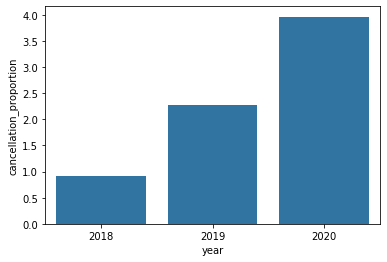

In [ ]:
# Find the proportion of cancelled flights for each year
arr_cancelled_prop = []
for year in range(2018,2021,1):
  print(year)  
  total_cancelled = df_canelled[df_canelled.year == year].shape[0]
  total_flights = total_cancelled + df[df.year == year].shape[0]
  cancellation_proportion = total_cancelled/total_flights * 100
  
  arr_cancelled_prop.append({'year':year,
                              'cancellation_proportion':cancellation_proportion
                            })

frame_cancelled_prop = pd.DataFrame(arr_cancelled_prop)
sb.barplot(data=frame_cancelled_prop,x= 'year',y='cancellation_proportion', color=sb.color_palette()[0])

> #### The cancellation increased by approximately 1.5% in may 2019. Consequently, in 2020 the rate increased also by about 1.5%.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  Part 2: The Cancellation rate is increasing annually by approximately 1.5%. Appearently, this increasing is the same in 2019 and 2020 despite of the COVID-19 impact. This might be as a result of the low flights number in 2020.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Part 1: The distance feature is not related directly with the delay time. However, the delay usually occur when traveling distance is more than 100 miles.

## Multivariate Exploration

### Q3.1: What is the flights count for each carrier in each year?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

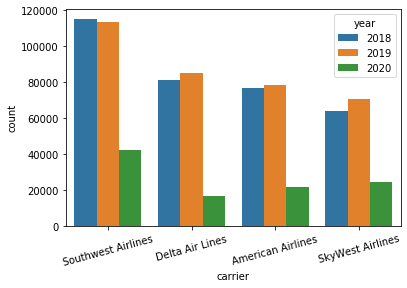

In [ ]:
# Flights number for each carrier/year
sb.countplot(data=df, x='carrier', hue='year')
plt.xticks(rotation=15)

### Q3.2: How do the delay durations differ between the three carriers in each year?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

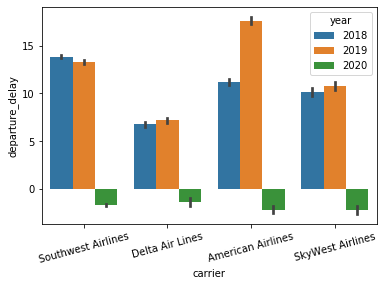

In [ ]:
sb.barplot(data=df, x='carrier', y='departure_delay', hue='year')
plt.xticks(rotation=15)

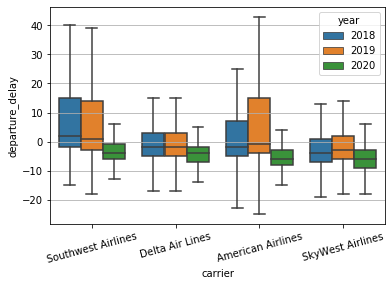

In [ ]:
# Additional plot: Box plot
sb.boxplot(data=df, x='carrier', y='departure_delay', hue='year', showfliers = False)
plt.xticks(rotation=15)
plt.grid(axis='y')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Part 1: Interestingly, may 2018 and 2019 had nearly equal number of flights with respect to each carrier. Nevertheless, may 2020 had sharp decline in flights number. Actually the main reason is COVID-19 impact.

> Part 2: The delay duration versus the carrier and the year shows something enthralling! The average delay duration for each carrier was positive but in 2020. This means that the flights was departing earlier than the scheduled.(negative value means earlier departure) 

### Were there any interesting or surprising interactions between features?

> As illustrated, the flights number dropped significantly in may 2020 compared with may 2018 and 2019. About 36% of the total number of flights in may 2018,2019 is operated in the same month in 2020 for southwest airlines, as instance. In addition, carriers at all tended to provide better services and trust for customers due to the restrictions and people worry about the pandemic.  